In [4]:
import numpy as np
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, b1, b2, u1, u2, w1, w2, F1, F2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * x1 + u1 * x1**3 - k2 * (x1 - x2) + u2 * (x1 - x2)**3 + F1 * np.cos(w1 * t)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1) + u2 * (x2 - x1)**3+ F2 * np.cos(w2 * t)) / m2]
    return f

In [5]:
#Usamos la funcion ODEINT para resolver las ecuaciones diferenciales definidas por el vector
from scipy.integrate import odeint

# Value of parameters
# Masses:
m1 = 1.0
m2 = 1.0
# spring constants 
k1 = 2/5
k2 = 1.0
# natural lenghts
L1 = 0.0
L2 = 0.0
# Friction coeficients
b1 = 1.0/10.0
b2 = 1.0/5.0

u1 = 1.0/6.0
u2 = 1.0/10.0

w1 = 1.0
w2 = 3.0/5.0

F1 = 1.0/3.0
F2 = 1.0/5.0

# Initial conditions
x1 = 0.7
y1 = 0.0
x2 = 0.1
y2 = 0.0

# Parametros de la ED
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 200.0
numpoints = 2150

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, b1, b2, u1, u2, w1, w2, F1, F2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs4.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3],file=f)

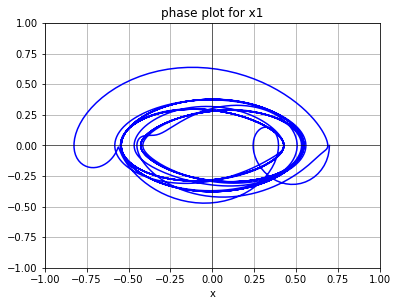

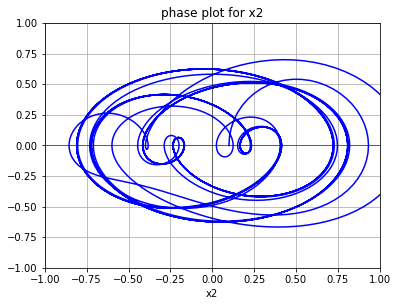

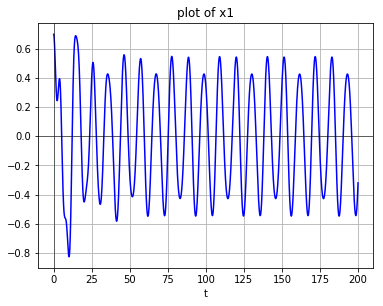

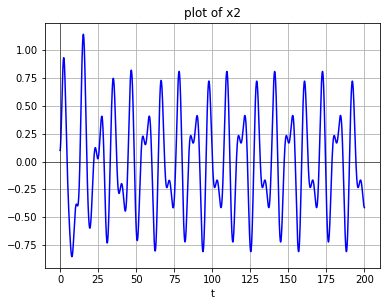

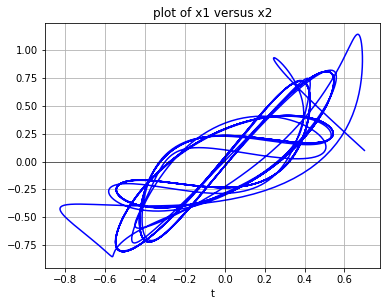

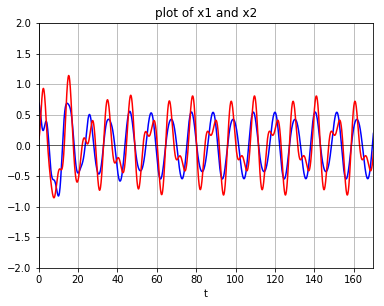

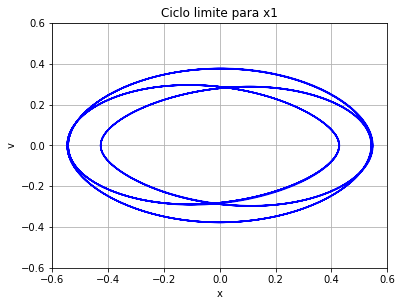

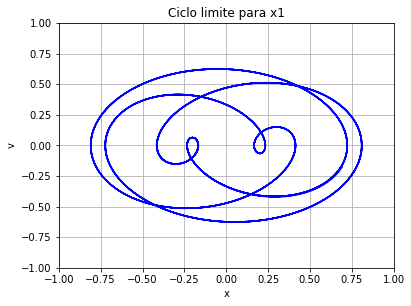

In [30]:
import numpy 
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('two_springs4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
grid(True)
lw = 1.5

plot(x1, y1, 'blue', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(-1,1)
plt.ylim(-1,1)

title('phase plot for x1')
savefig('ej4_11.png', dpi=100)

##################################################

figure(2, figsize=(6, 4.5))

xlabel('x2')
grid(True)
lw = 1.5

plot(x2, y2, 'blue', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(-1,1)
plt.ylim(-1,1)

title('phase plot for x2')
savefig('ej4_12.png', dpi=100)

####################################################

figure(3, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1.5

plot(t, x1, 'blue', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)



title('plot of x1')
savefig('ej4_13.png', dpi=100)

####################################################

figure(4, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1.5

plot(t, x2, 'blue', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)



title('plot of x2')
savefig('ej4_14.png', dpi=100)

####################################################

####################################################

figure(5, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1.5

plot(x1, x2, 'blue', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)



title('plot of x1 versus x2')
savefig('ej4_15.png', dpi=100)

####################################################

figure(6, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1.5

plot(t, x1, 'blue', linewidth=lw)
plot(t, x2, 'red', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(0,170)
plt.ylim(-2,2)


title('plot of x1 and x2')
savefig('ej4_16.png', dpi=100)

############################################
t_1, x1_2, y1_2, x2_2, y2_2 = loadtxt('two_springs4.dat', unpack=True, skiprows=718)

figure(7, figsize=(6, 4.5))

xlabel('x')
ylabel('v')
grid(True)
lw = 1.5

plot(x1_2, y1_2, 'blue', linewidth=lw)

plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)

title('Ciclo limite para x1')
savefig('ej4_17.png', dpi=100)

##########################################################


figure(8, figsize=(6, 4.5))

xlabel('x')
ylabel('v')
grid(True)
lw = 1.5

plot(x2_2, y2_2, 'blue', linewidth=lw)

plt.xlim(-1.0,1.0)
plt.ylim(-1.0,1.0)

title('Ciclo limite para x1')
savefig('Ej4_18.png', dpi=100)

